## Basic Logging Tutorial
Logging is a means of tracking events that happen when some software runs. The software’s developer adds logging calls to their code to indicate that certain events have occurred. An event is described by a descriptive message which can optionally contain variable data (i.e. data that is potentially different for each occurrence of the event). Events also have an importance which the developer ascribes to the event; the importance can also be called the level or severity.

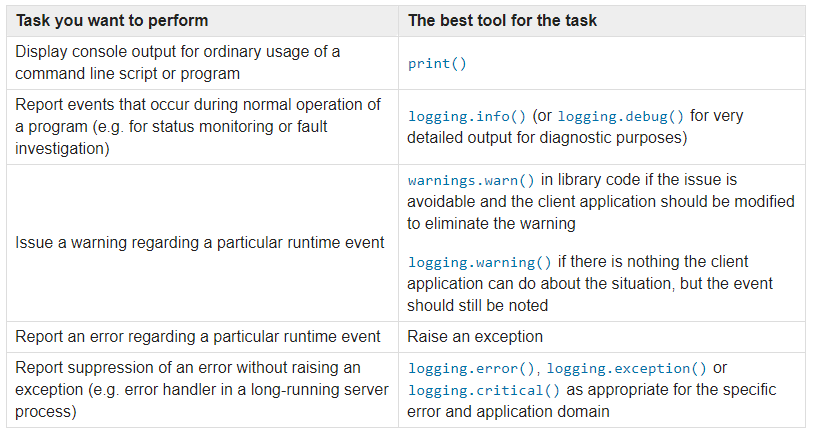

The logging functions are named after the level or severity of the events they are used to track. The standard levels and their applicability are described below (in increasing order of severity):

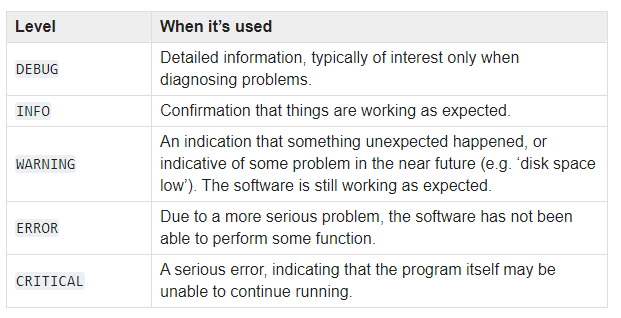

In [ ]:
import logging
logging.warning('Watch out!')
logging.info('I told you so')

## Logging to a file

In [ ]:
import logging
logging.basicConfig(filename = 'file.log',encoding = 'utf-8',level = logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [ ]:
import logging
logging.basicConfig(filename='example.log', encoding='utf-8', level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [ ]:
import logging
logging.basicConfig(filename = 'logfile.log',
                    filemode = 'w',
                    encoding = 'utf-8',
                    level = logging.DEBUG
                   )
logging.debug('This is Debug')
logging.info("This is Info")
logging.warning('This is warning')
logging.error('This is Erro')
logging.critical('This is critical')

In [ ]:
import logging
# import mylib

def do_something():
    logging.info('Doning Something')
    
def main():
    logging.basicConfig(filename = 'myapp.log',
                        level = logging.INFO
                       )
    logging.info('Started')
    do_something()
    logging.info('Finished')
if __name__ == '__main__':
    main()

## Logging Vaariable Data

In [ ]:
import logging
val='Look'
val2 = 'Leap'
logging.basicConfig(level = logging.warning)
logging.warning(f"{val} Before you {val2}")

## Changing the format of displayed messages

In [ ]:
# To change the format which is used to display messages, you need to specify the format you want to use
import logging
logging.basicConfig(format = '%(levelname)s:%(message)s', level = logging.DEBUG)
logging.debug('This message should appear on the console')
logging.info('So should this')
logging.warning('And this too')

In [ ]:
logging.basicConfig(level = logging.DEBUG)
logging.debug('Hey')

In [ ]:
# To display the date and time of an event, you would place ‘%(asctime)s’ in your format string:
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('is when this event was logged')

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logging.warning('This is when the event was logged')

## Advanced Logging Tutorial
The logging library tasked a modular approach and offers several categories of components: loggers, handlers, filters and formatters
* Loggers expose the interface that application code directly uses.
* Handlers send the log records (created by loggers) to the appropriate destination.
* Filters provide a finer grained facility for determining which log records to output
* Formatters specify the layout of log records in the final output

Log event information is passed between loggers, handlers, filters and formatters in a LogRecord instance.

Logging is performed by calling methods on instances of the `Logger` class (hereafter called loggers). Each instance has a name and they are conceptually arranged in a namespace hierarchy using dots (periods) as separators. For example a logger names can be anything you want and indicate the area of an application in which a logged message originates.

A good convention to use when naming loggers is to use a module-level logger, in each module whoch uses logging, named as follows:

In [ ]:
logger = logging.getLogger(__name__)
print(logger)

This means that logger names track the package/module hierarchy, and it’s intuitively obvious where events are logged just from the logger name.

The root of the hierarchy of loggers is called the root logger. That’s the logger used by the functions debug(), info(), warning(), error() and critical(), which just call the same-named method of the root logger. The functions and the methods have the same signatures. The root logger’s name is printed as ‘root’ in the logged output.

It is, of course, possible to log messages to different destinations. Support is included in the package for writing log messages to files, HTTP GET/POST locations, email via SMTP, generic sockets, queues, or OS-specific logging mechanisms such as syslog or the Windows NT event log. Destinations are served by handler classes. You can create your own log destination class if you have special requirements not met by any of the built-in handler classes.

## Loggers

Logger objects have a threefold job. First, they expose several methods to application code so that applications can log messages at runtime. Second, logger objects determine which log messages to act upon based upon severity (the default filtering facility) or filter objects. Third, logger objects pass along relevant log messages to all interested log handlers.

The most widely used methods on logger objects fall into two categories configuration and message sending.

Thesse are the most common configuration methods:

* `Logger.setLevel()` Specifies the lowest-severity log message a logger will haldle where debug is the lowest built-in severity level and critical is the highest built-in severity. For example if the severity level is INFO the logger will handle only INFO, WARNING, ERROR and CRITICAL messages and will ignore DEBUG messages.
* `Logger.addHandler()` and `Logger.removeHandler()` add and remove handler objects from the logger object.
* `Logger.addFilter()` and `Logger.removeFilter()` add and remove filter objects from the logger object

With the logger object configures the following methods create log messages:
* `Logger.debug()`, `Logger.info()`, `Logger.warning()`, `Logger.error()`, and `Logger,critical()` all create log records with a message and a level that corresponds to their respecttive method names. THe message is actually a format string, so you know
* `Logger.exception()` creates log message similar to Logger,error(). The difference is that `Logger.exception()` dumps a stack trace along with it. Call this method only form an exception handler.
* `Logger.log()` takes a log level as an explict argument. This is a little more verbose for logging messages than using the log level convenience methods listed above, but this is how to log at custom log levels.

`getLogger()` returns a reference to a logger instance with specified name is it is provided or root if not.
The names are period-seperated hierarchical structures. Multiple calls to `getLogger()` with the same name will return a reference to same logger object Loggers that are further down in the hierarchical list are children of loggers higher up in the list. For example given a logger with a name of foo, loggers higgers with names of foo.bar, foo.bar, foo.bar.baz and foo.bam are all descendants of foo.

Loggers have a concept of effective level. If a level is not explicitly set on a logger, the level of its parent is used instead as its effective level. If the parent has no explicit level set, its parent is examined, and so on - all ancestors are searched until an explicitly set level is found. The root logger always has an explicit level set (WARNING by default). When deciding whether to process an event, the effective level of the logger is used to determine whether the event is passed to the logger’s handlers.

## Handlers
Handler objects are responsible for dispatching the appropriate log messages (based on the log messages severity) to the handlers specified destination. Logger objects can add zero or more handler objects to themselves with an addHandler()
```
As an example scenario, an application may want to send all log messages to a log file, all log messages of error or higher to stdout, and all messages of critical to an email address. This scenario requires three individual handlers where each handler is responsible for sending messages of a specific severity to a specific location.
```

The standard library includes quite a few handler types (see Useful Handlers); the tutorials use mainly StreamHandler and FileHandler in its examples.

There are very few methods in a handler for application developers to concern themselves with. The only handler methods that seem relevant for application developers who are using the built-in handler objects (that is, not creating custom handlers) are the following configuration methods:

* The setlevel method just as in logger objects specifies the lowest severity that will be dispatched to the appropriate destination. Why are there two `setLevel()` methods? The level set in the logger determines which severity of messages it will pass to its handlers. The level set in each handler determines which messages that handler will send on
* `setFormatter()` selects a Formatter object for this handler to use.
* `addFilter()` and `reoveFilter()` respictively configure amd deconfigure filter objects on handlers.

Application code should not directly instantiate and use instances of Handler instead the Handler class is a case class that defines the interface that all handlers should have ad establishes some defailt behhaviour that child classes can use (ro override).

## Formatters

Formatter objects configure the final order, structure, and contents of the log message. Unlike the base logging.Handler class, application code may instantiate formatter classes, although you could likely subclass the formatter if your application needs special behavior. The constructor takes three optional arguments – a message format string, a date format string and a style indicator.
  
`logging.Formatter.__init__(fmt=None, datefmt=None, style='%')`

If there are no message format string the default is to use the raw message. If there is no date format string the defult date format is 
```
%Y-%m-%d %H:%M:%S

```

The following message format string will log time in a human-readable format, the severity of the contents of the message in that order:

```
'%(asctime)s - %(levelname)s - %(message)s'
```

Formatters use a user configurable function to convert the creation time of a record to a tuple. 

## Configuring Logging

Programmers can configure logging in three ways:
1. Creating loggers handlers, and formatters explicitly using Python code that calls the configuration methods listed above.
2. Creating a logging config file and reading it using the `fileConfig()` function.
3. Creating a dict of configuration information and passing it to the `disctConfig()` function.

In [1]:
import logging

# Create Logger
#It I give nothing here, it will print default that is root
logger = logging.getLogger('simple_example')
logger.setLevel(logging.WARNING)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# Create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

#add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

#Application code
logger.debug('Debug Message')
logger.info('Info Message')
logger.warning('Warning Message')
logger.error('Error Message')
logger.critical('Critical Message')

2021-01-14 00:47:25,732 - simple_example - WARNING - Warning Message
2021-01-14 00:47:25,736 - simple_example - ERROR - Error Message
2021-01-14 00:47:25,737 - simple_example - CRITICAL - Critical Message


The following Python Module create a logger handler and formatter nearly idenntical to those in the example listed above with the only difference being the names of the object:

In [ ]:
import logging
import logging.config

logging.config.fileConfig('logging.conf')

# create logger
logger = logging.getLogger('simpleExample')

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

In [ ]:
[loggers]
keys=root,simpleExample

[handlers]
keys=consoleHandler

[formatters]
keys=simpleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[logger_simpleExample]
level=DEBUG
handlers=consoleHandler
qualname=simpleExample
propagate=0

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=simpleFormatter
args=(sys.stdout,)

[formatter_simpleFormatter]
format=%(asctime)s - %(name)s - %(levelname)s - %(message)s
datefmt=

## What happens if no configuration is provided

If no logging configuration is provided, it is possible to have a situation where a logging event needs to be output, but no handlers can be found to output the event. The behaviour of the logging package in these circumstances is dependent on the Python version.

For versions of Python prior to 3.2, the behaviour is as follows:

* If logging.raiseExceptions is False (production mode), the event is silently dropped.

* If logging.raiseExceptions is True (development mode), a message ‘No handlers could be found for logger X.Y.Z’ is printed once.

In Python 3.2 and later, the behaviour is as follows:

* The event is output using a ‘handler of last resort’, stored in logging.lastResort. This internal handler is not associated with any logger, and acts like a StreamHandler which writes the event description message to the current value of sys.stderr (therefore respecting any redirections which may be in effect). No formatting is done on the message - just the bare event description message is printed. The handler’s level is set to WARNING, so all events at this and greater severities will be output.

To obtain the pre-3.2 behaviour, logging.lastResort can be set to None.

## Configuring Logging for a Library

When developing a library which uses logging, you should take care to document how the library uses logging - for example, the names of loggers used. Some consideration also needs to be given to its logging configuration. If the using application does not use logging, and library code makes logging calls, then (as described in the previous section) events of severity WARNING and greater will be printed to sys.stderr. This is regarded as the best default behaviour.

If for some reason you don’t want these messages printed in the absence of any logging configuration, you can attach a do-nothing handler to the top-level logger for your library. This avoids the message being printed, since a handler will always be found for the library’s events: it just doesn’t produce any output. If the library user configures logging for application use, presumably that configuration will add some handlers, and if levels are suitably configured then logging calls made in library code will send output to those handlers, as normal.

A do-nothing handler is included in the logging package: NullHandler (since Python 3.1). An instance of this handler could be added to the top-level logger of the logging namespace used by the library (if you want to prevent your library’s logged events being output to sys.stderr in the absence of logging configuration). If all logging by a library foo is done using loggers with names matching ‘foo.x’, ‘foo.x.y’, etc. then the code:

```
import logging
logging.getLogger('foo').addHandler(logging.NullHander())
```

## Logging Levels
The numeric values of logging levels are given in the following table. There are primarily of interest if you want to define your own levels, and need them to have specific values relative to the predefined levels. If you define a level with the same umeric value, it overwrites the predefined value; the predefined name is lost

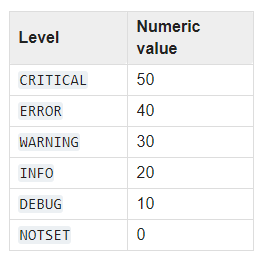

Levels can also be associated with lggers being set either by the developer or through loading a saved logging configuration. When a logging method is called on a logger, the logger compares its own level with the level associated with the method call. If the logger's level is higher that the method call's no logging message is actually generated. This is the basic mechanism controlling the verbosity of logging output.

Logging messages are encoded as instances of the LogRecord class. When a logger decides to actually log an event a LogRecord instance is created from the logging message.

Logging messages are subjected to a dispatch mechanism through the use of handlers, which are instances of subclasses of the Handler class. Handlers are responsible for ensuring that a logged message (in the form of a LogRecord) ends up in a particular location (or set of locations) which is useful for the target audience for that message (such as end users, support desk staff, system administrators, developers). Handlers are passed LogRecord instances intended for particular destinations. Each logger can have zero, one or more handlers associated with it (via the addHandler() method of Logger). In addition to any handlers directly associated with a logger, all handlers associated with all ancestors of the logger are called to dispatch the message (unless the propagate flag for a logger is set to a false value, at which point the passing to ancestor handlers stops).

Just as for loggers, handlers can have levels associated with them. A handler’s level acts as a filter in the same way as a logger’s level does. If a handler decides to actually dispatch an event, the emit() method is used to send the message to its destination. Most user-defined subclasses of Handler will need to override this emit().

## Custom Levels

Defining your own levels is possible, but should not be necessary, as the existing levels have been chosen on the basis of practical experience. However, if you are convinced that you need custom levels, great care should be exercised when doing this, and it is possibly a very bad idea to define custom levels if you are developing a library. That’s because if multiple library authors all define their own custom levels, there is a chance that the logging output from such multiple libraries used together will be difficult for the using developer to control and/or interpret, because a given numeric value might mean different things for different libraries.

## Useful Handlers
In addition to the base Handler class, many useful subclasses are provided:

1. **StreamHandler** instances send messages to streams (file-like objects).

2. **FileHandler** instances send messages to disk files.

3. **BaseRotatingHandler** is the base class for handlers that rotate log files at a certain point. It is not meant to be instantiated directly. Instead, use RotatingFileHandler or TimedRotatingFileHandler.

4. **RotatingFileHandler** instances send messages to disk files, with support for maximum log file sizes and log file rotation.

5. **TimedRotatingFileHandler** instances send messages to disk files, rotating the log file at certain timed intervals.

6. **SocketHandler** instances send messages to TCP/IP sockets. Since 3.4, Unix domain sockets are also supported.

7. **DatagramHandler** instances send messages to UDP sockets. Since 3.4, Unix domain sockets are also supported.

8. **SMTPHandler** instances send messages to a designated email address.

9. **SysLogHandler** instances send messages to a Unix syslog daemon, possibly on a remote machine.

10. **NTEventLogHandler** instances send messages to a Windows NT/2000/XP event log.

11. **MemoryHandler** instances send messages to a buffer in memory, which is flushed whenever specific criteria are met.

12. **HTTPHandler** instances send messages to an HTTP server using either GET or POST semantics.

13. **WatchedFileHandler** instances watch the file they are logging to. If the file changes, it is closed and reopened using the file name. This handler is only useful on Unix-like systems; Windows does not support the underlying mechanism used.

14. **QueueHandler** instances send messages to a queue, such as those implemented in the queue or multiprocessing modules.

15. **NullHandler** instances do nothing with error messages. They are used by library developers who want to use logging, but want to avoid the ‘No handlers could be found for logger XXX’ message which can be displayed if the library user has not configured logging. See Configuring Logging for a Library for more information.


## Optimization

Formatting of message arguments is deferred until it cannot be avoided. However, computing the arguments passed to the logging method can also be expensive, and you may want to avoid doing it if the logger will just throw away your event. To decide what to do, you can call the isEnabledFor() method which takes a level argument and returns true if the event would be created by the Logger for that level of call. You can write code like this:
```
if logger.isEnabledFor(logging.DEBUG):
    logger.debug('Message with %s, %s', expensive_func1(),
                                        expensive_func2())
```

**Note** In some cases, isEnabledFor() can itself be more expensive than you’d like (e.g. for deeply nested loggers where an explicit level is only set high up in the logger hierarchy). In such cases (or if you want to avoid calling a method in tight loops), you can cache the result of a call to isEnabledFor() in a local or instance variable, and use that instead of calling the method each time. Such a cached value would only need to be recomputed when the logging configuration changes dynamically while the application is running (which is not all that common).

There are other optimizations which can be made for specific applications which need more precise control over what logging information is collected. Here’s a list of things you can do to avoid processing during logging which you don’t need:

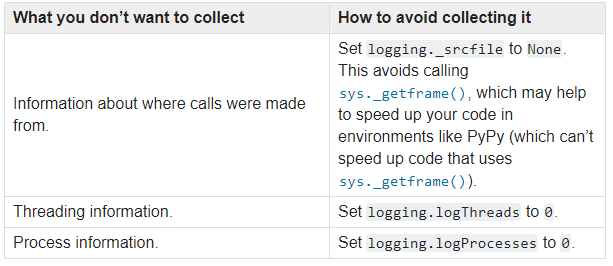

## Logging Handlers

1. **StreamHandler** *(stream=None)*
The StreamHandler class, located in the core logging package, sends logging output to streams such as sys.stdout, sys.stderr or any file-like object (or, more precisely, any object which supports write() and flush() methods).
`emit(record)`, `flush()`, `setStream(stream)`, `terminator`
2. **FileHandler** *(filename, mode='a', encoding=None, delay=False, errors=None)*  
The FileHandler class, located in the core logging package, sends logging output to a disk file. It inherits the output functionality from StreamHandler.
`close()`, `emit(record)`
3. **NullHandler**  
The NullHandler class, located in the core logging package, does not do any formatting or output. It is essentially a ‘no-op’ handler for use by library developers.
`emit(record)`,`handle(record)`,`createLock()`
4. **WatchedFileHandler** *(filename, mode='a', encoding=None, delay=False, errors=None)*  
The WatchedFileHandler class, located in the logging.handlers module, is a FileHandler which watches the file it is logging to. If the file changes, it is closed and reopened using the file name.   
A file change can happen because of usage of programs such as newsyslog and logrotate which perform log file rotation. This handler, intended for use under Unix/Linux, watches the file to see if it has changed since the last emit. (A file is deemed to have changed if its device or inode have changed.) If the file has changed, the old file stream is closed, and the file opened to get a new stream.
This handler is not appropriate for use under Windows, because under Windows open log files cannot be moved or renamed - logging opens the files with exclusive locks - and so there is no need for such a handler. Furthermore, ST_INO is not supported under Windows; stat() always returns zero for this value.
`reopenIfNeeded()`, `emit(record)`
5. **BaseRotatingHandler** *(filename, mode, encoding=None, delay=False, errors=None)*  
The BaseRotatingHandler class, located in the logging.handlers module, is the base class for the rotating file handlers, RotatingFileHandler and TimedRotatingFileHandler. You should not need to instantiate this class, but it has attributes and methods you may need to override.
`namer`,`rotator`,`rotation_filename(default_name)`,`rotate(source,dest)`..
The reason the attributes exist is to save you having to subclass - you can use the same callables for instances of RotatingFileHandler and TimedRotatingFileHandler. If either the namer or rotator callable raises an exception, this will be handled in the same way as any other exception during an emit() call, i.e. via the handleError() method of the handler.
If you need to make more significant changes to rotation processing, you can override the methods.
6. **RotatingFileHandler** *(filename, mode='a', maxBytes=0, backupCount=0, encoding=None, delay=False, errors=None)*  
Returns a new instance of the RotatingFileHandler class. The specified file is opened and used as the stream for logging. If mode is not specified, 'a' is used. If encoding is not None, it is used to open the file with that encoding. If delay is true, then file opening is deferred until the first call to emit(). By default, the file grows indefinitely. If errors is provided, it determines how encoding errors are handled.
`doRollover()`, `emit(record)`
7. **TimedRotatingFileHandler** *(filename, when='h', interval=1, backupCount=0, encoding=None, delay=False, utc=False, atTime=None, errors=None)* 
Returns a new instance of the TimedRotatingFileHandler class. The specified file is opened and used as the stream for logging. On rotating it also sets the filename suffix. Rotating happens based on the product of when and interval.
You can use the when to specify the type of interval. The list of possible values is below. Note that they are not case sensitive.
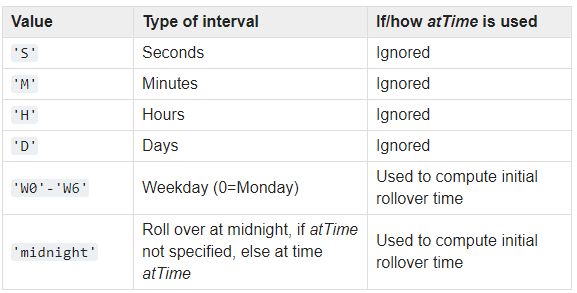
`doRollover()`, `emit(record)`
8. **SocketHandler** *(host,port)*  
Returns a new instance of the SocketHandler class intended to communicate with a remote machine whose address is given by host and port.
`close()`,`emit()`,`handleError()`,`makeSocket()`,`makePickle(record)`, `send(packet)`, `createSocket()`
9. **DatagramHandler** *(host, port)*  
The DatagramHandler class, located in the logging.handlers module, inherits from SocketHandler to support sending logging messages over UDP sockets.
`emit()`,`makeSocket()`,`send(s)`
10. **SysLogHandler** *(address=('localhost', SYSLOG_UDP_PORT), facility=LOG_USER, socktype=socket.SOCK_DGRAM)*
Returns a new instance of the SysLogHandler class intended to communicate with a remote Unix machine whose address is given by address in the form of a (host, port) tuple. If address is not specified, ('localhost', 514) is used. The address is used to open a socket. An alternative to providing a (host, port) tuple is providing an address as a string, for example ‘/dev/log’. In this case, a Unix domain socket is used to send the message to the syslog. If facility is not specified, LOG_USER is used. The type of socket opened depends on the socktype argument, which defaults to socket.SOCK_DGRAM and thus opens a UDP socket. To open a TCP socket (for use with the newer syslog daemons such as rsyslog), specify a value of socket.SOCK_STREAM.
Note that if your server is not listening on UDP port 514, SysLogHandler may appear not to work. In that case, check what address you should be using for a domain socket - it’s system dependent. For example, on Linux it’s usually ‘/dev/log’ but on OS/X it’s ‘/var/run/syslog’. You’ll need to check your platform and use the appropriate address (you may need to do this check at runtime if your application needs to run on several platforms). On Windows, you pretty much have to use the UDP option.
`close()`, `emit(record)`, `encodePriority(facility, priority)`, `mapPriority(levelname)` - 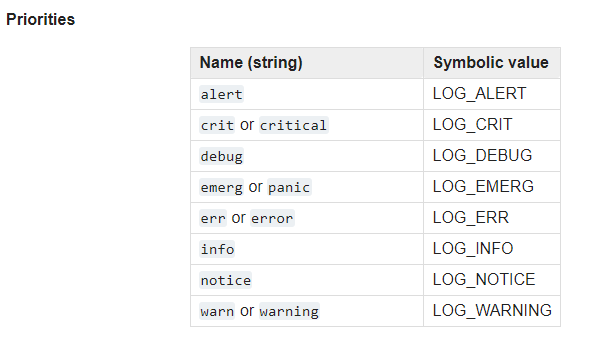
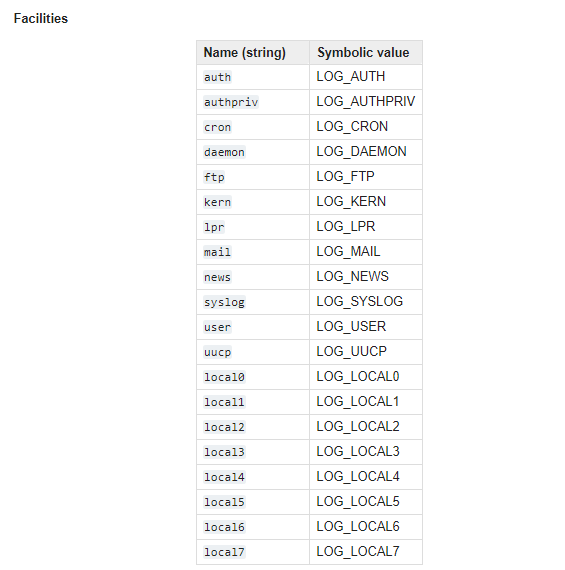
11. **NTEventLogHandler** *(appname, dllname=None, logtype='Application')*  
The NTEventLogHandler class, located in the logging.handlers module, supports sending logging messages to a local Windows NT, Windows 2000 or Windows XP event log. Before you can use it, you need Mark Hammond’s Win32 extensions for Python installed.
`close()`,`emit(record)`,`getEventCategory(record)`, `getEventType(record)`, `getMessageID(record)`
12. **SMTPHandler** *(mailhost, fromaddr, toaddrs, subject, credentials=None, secure=None, timeout=1.0)*    
The SMTPHandler class, located in the logging.handlers module, supports sending logging messages to an email address via SMTP.
`emit(record)`, `getSubject(record)`
13. **MemoryHandler**  
The MemoryHandler class, located in the logging.handlers module, supports buffering of logging records in memory, periodically flushing them to a target handler. Flushing occurs whenever the buffer is full, or when an event of a certain severity or greater is seen.
MemoryHandler is a subclass of the more general BufferingHandler, which is an abstract class. This buffers logging records in memory. Whenever each record is added to the buffer, a check is made by calling shouldFlush() to see if the buffer should be flushed. If it should, then flush() is expected to do the flushing
```
class logging.handlers.BufferingHandler(capacity)
```
Initializes the handler with a buffer of the specified capacity. Here, capacity means the number of logging records buffered.
`emit(record)`, `flush()`, `shouldFlush(record)`.
```
class logging.handlers.MemoryHandler(capacity, flushLevel=ERROR, target=None, flushOnClose=True)
```
Returns a new instance of the MemoryHandler class. The instance is initialized with a buffer size of capacity (number of records buffered). If flushLevel is not specified, ERROR is used. If no target is specified, the target will need to be set using setTarget() before this handler does anything useful. If flushOnClose is specified as False, then the buffer is not flushed when the handler is closed. If not specified or specified as True, the previous behaviour of flushing the buffer will occur when the handler is closed.
`close()`, `flush()`, `setTarget(target)`, `shouldFlush(record)`
14. **HTTPHandler** *(host, url, method='GET', secure=False, credentials=None, context=None)*
The HTTPHandler class, located in the logging.handlers module, supports sending logging messages to a Web server, using either GET or POST semantics.
Returns a new instance of the HTTPHandler class. The host can be of the form host:port, should you need to use a specific port number. If no method is specified, GET is used. If secure is true, a HTTPS connection will be used. The context parameter may be set to a ssl.SSLContext instance to configure the SSL settings used for the HTTPS connection. If credentials is specified, it should be a 2-tuple consisting of userid and password, which will be placed in a HTTP ‘Authorization’ header using Basic authentication. If you specify credentials, you should also specify secure=True so that your userid and password are not passed in cleartext across the wire.
`mapLogRecord(record)`, `emit(record)`
15. **QueueHandler** *(queue)*
The QueueHandler class, located in the logging.handlers module, supports sending logging messages to a queue, such as those implemented in the queue or multiprocessing modules.
Along with the QueueListener class, QueueHandler can be used to let handlers do their work on a separate thread from the one which does the logging. This is important in Web applications and also other service applications where threads servicing clients need to respond as quickly as possible, while any potentially slow operations (such as sending an email via SMTPHandler) are done on a separate thread.
`emit(record)`, `prepare(record)`, `enqueue(record)`  
16. **QueueListener** *(queue, *handlers, respect_handler_level=False)*  
The QueueListener class, located in the logging.handlers module, supports receiving logging messages from a queue, such as those implemented in the queue or multiprocessing modules. The messages are received from a queue in an internal thread and passed, on the same thread, to one or more handlers for processing. While QueueListener is not itself a handler, it is documented here because it works hand-in-hand with QueueHandler.
Along with the QueueHandler class, QueueListener can be used to let handlers do their work on a separate thread from the one which does the logging. This is important in Web applications and also other service applications where threads servicing clients need to respond as quickly as possible, while any potentially slow operations (such as sending an email via SMTPHandler) are done on a separate thread.
`dequeue(block)`, `prepare(record)`, `handle(record)`, `start()`, `stop()`, `enqueue_sentinel()`